In [2]:
import numpy as np
# 산술평균
data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)

30.0


In [3]:
# 기하평균
from scipy.stats import hmean, gmean
gmean(data)

np.float64(26.051710846973528)

In [4]:
# 조화평균
hmean(data)

np.float64(21.8978102189781)

In [5]:
# 가중평균
prices = [5000,9000]    # 가격
counts = [8,2]          # 개수

np.average(prices, weights=counts)

np.float64(5800.0)

In [6]:
# 대표값 - 중앙값
median_value = np.median(data)
print(median_value)

30.0


In [7]:
# 백분위수
scores = [65, 75, 80, 85, 95]
p25 = np.percentile(scores, 25)   #Q1
p50 = np.percentile(scores, 50)   #Q2
p75 = np.percentile(scores, 75)   #Q3
print(p25,p50,p75)

75.0 80.0 85.0


In [8]:
# IQR : 사분위범위 Q3-Q1 = 85-75 = 10
p75 - p25

np.float64(10.0)

중앙값, 분위수는 개수(위치)를 중요시하는 통계량 
이상값 / 극단적인 값이 중요하지 않다.

In [9]:
# 대표값 - 최빈값
import pandas as pd

data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4])
mode_value = data.mode()
print(mode_value)  # 3 (가장 많이 등장한 값)

0    3
dtype: int64


범위의 계산 > 변동성을 측정하는 지표<br> 
지표 > 극단적인 값에 민감

- 최대/최소 2개의 값만 사용
- 개별점수들이 다른 점수들과 얼마나 차이가 있나 x
- 실제 데이터가 어떤 값들로 구성되어 있는지를 설명할 수 없다.

In [10]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


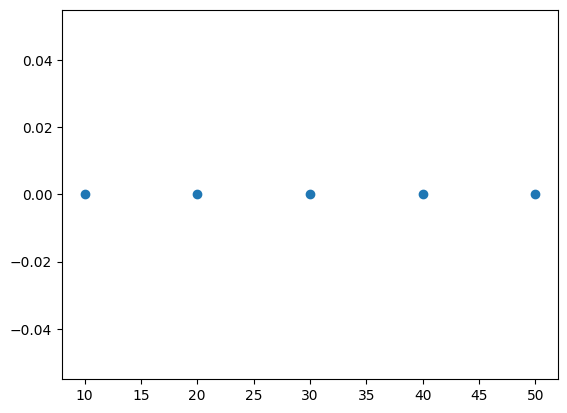

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data, np.zeros_like(data))


In [12]:
import seaborn as sns
vp_df = sns.load_dataset('iris')

vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#sepal_length의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [14]:
# 모든 속성의 범위를 확인
# 반복문

for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]):
        print(f"{col}의 범위 : {vp_df[col].max() - vp_df[col].min()}")
    else:
        pass

sepal_length의 범위 : 3.6000000000000005
sepal_width의 범위 : 2.4000000000000004
petal_length의 범위 : 5.9
petal_width의 범위 : 2.4


변동성이 가장 큰 속성은 petal_length입니다.<br>
petal_length와 petal_width가 <br>
sepal_length와 sepal_width보다 상대적으로 변동성이 큽니다.<br>

모델 생성시에 다루어야 하는 속성으로 볼 수 있습니다.

Text(0.5, 1.0, 'setal_length, setal_width compare')

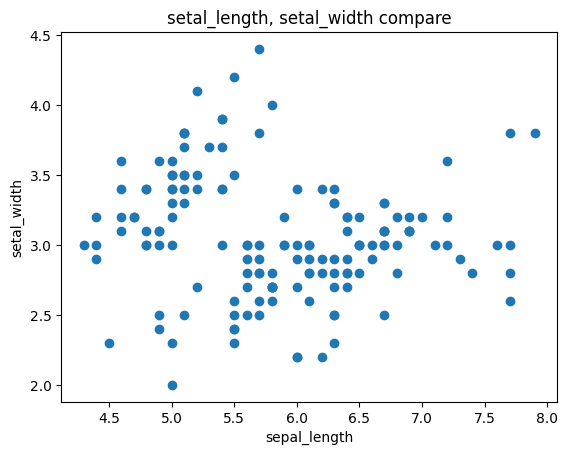

In [15]:
# 산포도로 변동성 확인하기
# petal_length와 petal_width 그리기
plt.scatter(vp_df['sepal_length'], vp_df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('setal_width')
plt.title('setal_length, setal_width compare')

Text(0.5, 1.0, 'petal_length, petal_width compare')

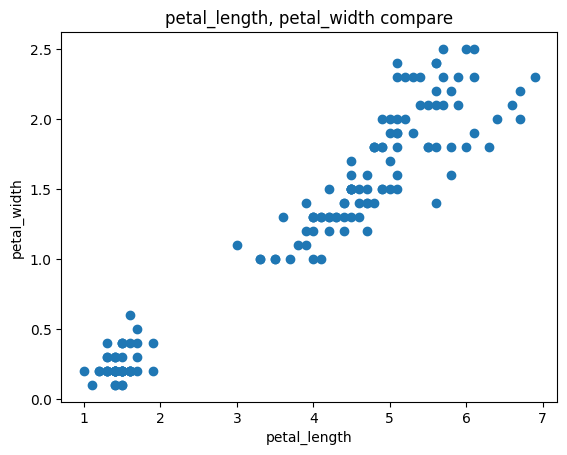

In [16]:
plt.scatter(vp_df['petal_length'], vp_df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length, petal_width compare')

In [17]:
# 산포도를 이용해 극단적인 다른 데이터(이상치)가 있는 지를 확인해야한다

In [18]:
# 분산

In [19]:
variance_value = np.var(data)
print(variance_value)

200.0


In [20]:
# 표준편차
std_dev = np.std(data)
print(std_dev)

14.142135623730951


In [21]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

bins = np.arange(0,240,10)

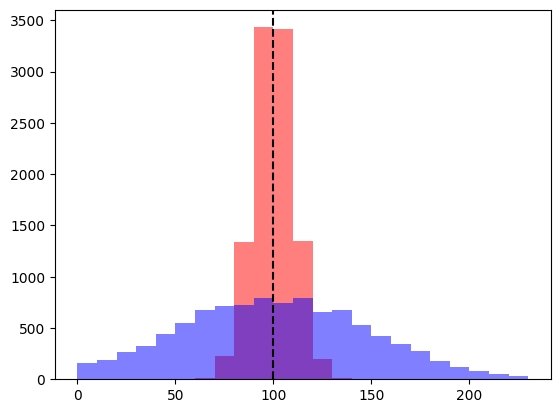

In [22]:
plt.hist(data1, bins, color='red', alpha=0.5)
plt.hist(data2, bins, color='blue', alpha=0.5)

# 평균선 표시
plt.axvline(mu, color='black', linestyle='--')

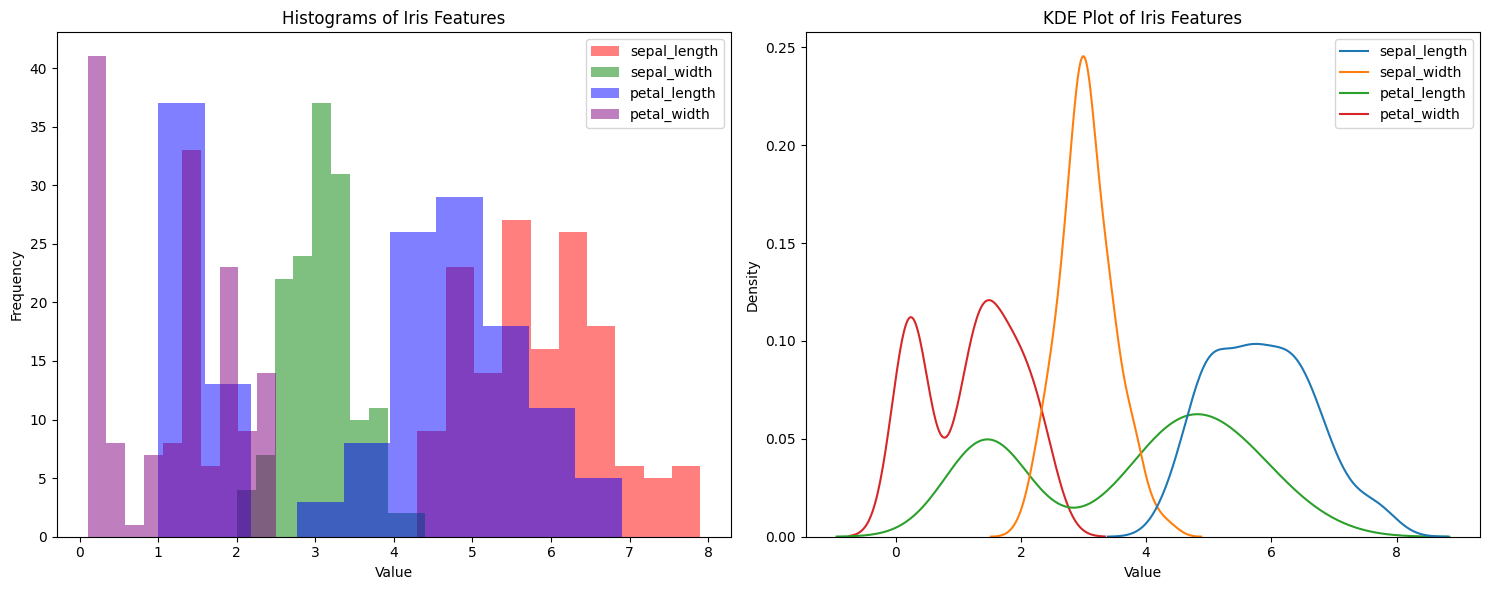

In [23]:
# iris data 속성들의 표준편차 비교분석 
import seaborn as sns
import matplotlib.pyplot as plt

# Iris 데이터셋 로드
iris = sns.load_dataset('iris')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# (1) 히스토그램 개선
# 투명도(alpha)와 라벨을 지정하여 겹쳐도 구분이 가능하게 합니다.
axes[0].hist(iris['sepal_length'], bins=10, alpha=0.5, label='sepal_length', color='red')
axes[0].hist(iris['sepal_width'], bins=10, alpha=0.5, label='sepal_width', color='green')
axes[0].hist(iris['petal_length'], bins=10, alpha=0.5, label='petal_length', color='blue')
axes[0].hist(iris['petal_width'], bins=10, alpha=0.5, label='petal_width', color='purple')
axes[0].set_title('Histograms of Iris Features')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# (2) KDE 플롯 (전문가적인 시각화)
# 각 변수의 분포 곡선을 부드럽게 시각화하여 비교하기 용이합니다.
sns.kdeplot(data=iris, ax=axes[1])
axes[1].set_title('KDE Plot of Iris Features')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# 사분위 범위

In [24]:
numeric_df = vp_df.select_dtypes(include=['Float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

summ = pd.DataFrame({'Q1':Q1,
                     'Q3':Q3,
                     'IQR': IQR})

summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수 : petal_length<br>
가장 분산이 작은 변수 : sepal_width<br>
품종을 분류할 때, petal_length가 민감하게 작용될 것이다.<br>
식별력이 크다.<br>
** IQR > 이상치의 허용범위가 크다

# 분포의 모양, 형태

- 모양이 정규분포인지
- 치우쳐져 있는가 / 좌/우, 위/아래
- 특이한 패턴이 있는가 / 쌍봉

In [25]:
import pandas as pd
import numpy as np

#데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

#DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분포 형태 : 5개의 변수
- 값의 범위, 도수가 많은 구간 (count) 빈도

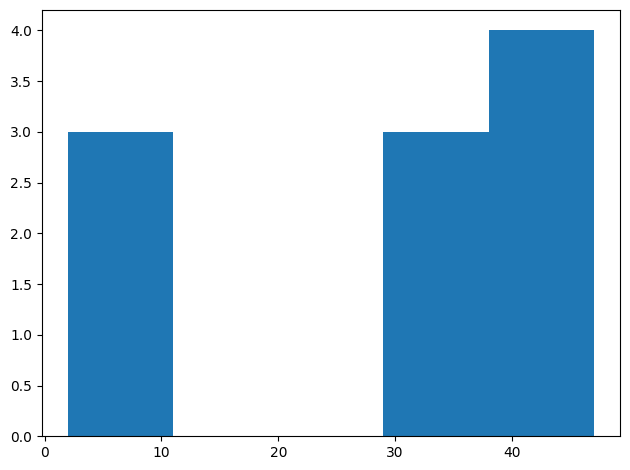

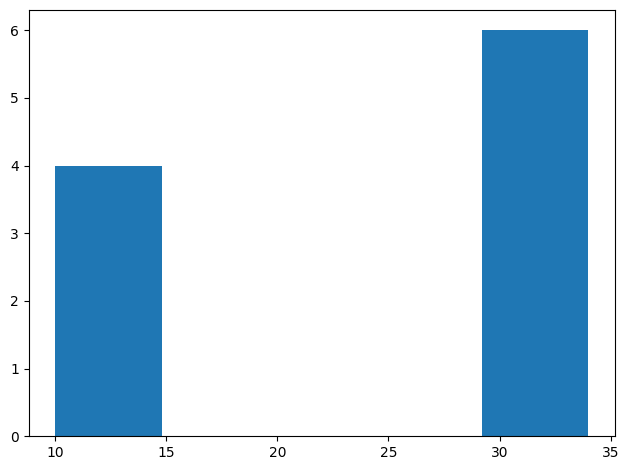

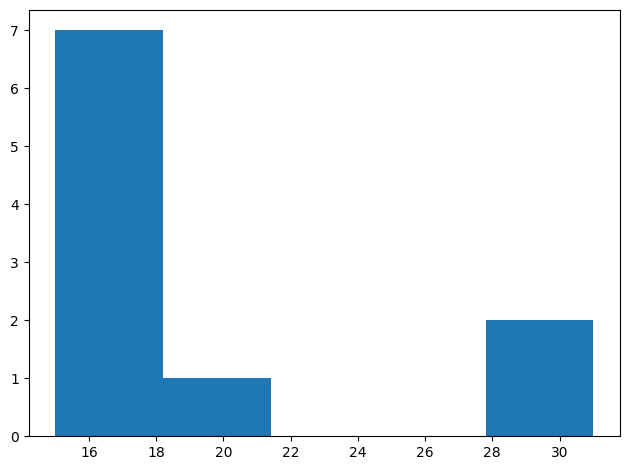

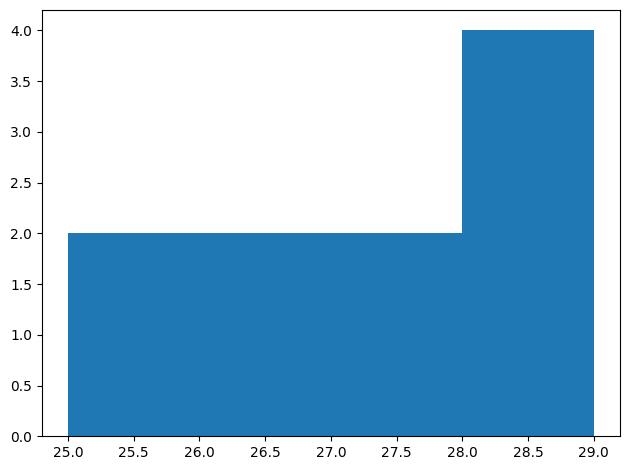

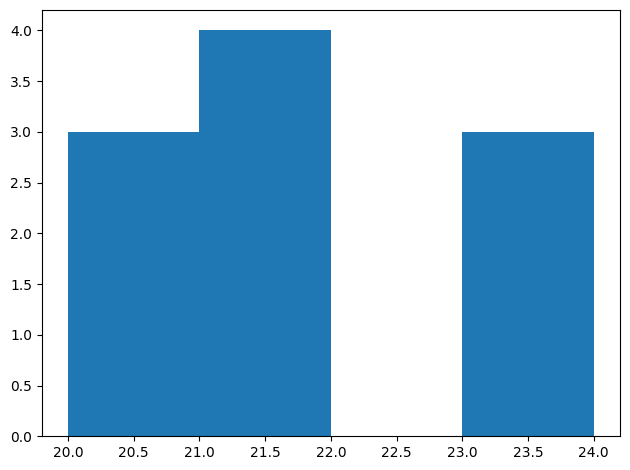

In [ ]:
# 각 속성별로 히스토그램
for col in df.columns:
 plt.hist(df[col], bins='sturges')
 plt.tight_layout()
 plt.show()

In [ ]:
from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


0 : 정규 분포 <br>
양수 첨도 : 정규분포보다 그만큼 뾰족하다 > 꼬리가 두껍다<br>
(길다)<br>
음수 첨도 : 정규분포보다 그만큼 눌려있다 > 꼬리가 얇다<br>
(짧다): 데이터가 평균 주변에 고르다

양의 첨도 > 3 , 정규분포보다 뾰족하고, 꼬리가 두꺼워서 이상치가 극단적인 값이 더 많다.
음의 첨도 < 3 , 정규분포보다 평평하고, 꼬리가 얇아서, 극단적인 값이 더 발생한다.

In [30]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 (오른쪽 꼬리)

1.1384199576606167


# 가설검정 단계

In [ ]:
대한민국 남성의 평균 몸무게는 70kg이다.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [32]:
# 1. 가설수립
#H0 : 대한민국 남성의 평균 몸무게는 70kg이다(차이가 없다)
#H1 : 대한민국 남성의 평균 몸무게는 70kg이 아니다

# 2. 통계량 산출 - 데이터 수집
np.random.seed(123)
weight = np.random.uniform(40,100,100)
# weight
test_result = stats.ttest_1samp(weight, 70)
print(f"평균 : {np.mean(weight)}")
print(f' p-value : {test_result.pvalue}')

# 3. 기각/채택 여부 판단
print(f'검정결과 : {'귀무가설 기각' if test_result.pvalue<0.05 else '귀무가설 채택'}')

# 4. 결정
if test_result.pvalue < 0.05:
    print('대한민국 남성의 평균 몸무게는 70kg아니다')
else: 
    print('대한민국 남성의 평균 몸무게는 70kg이다')

평균 : 70.08573280308887
 p-value : 0.953913826658112
검정결과 : 귀무가설 채택
대한민국 남성의 평균 몸무게는 70kg이다


In [33]:
# 표본 데이터 (30명)
coffee_data = [2.9, 2.4, 2.7, 3.0, 2.6, 2.8, 2.9, 3.1, 2.7, 2.6,
               2.8, 2.5, 3.2, 3.0, 2.4, 2.6, 2.7, 3.1, 2.8, 2.7,
               2.5, 2.9, 2.6, 2.8, 2.9, 2.5, 2.7, 2.8, 3.0, 2.9]

# 단일표본 t-검정
t_stat, p_value = stats.ttest_1samp(coffee_data, popmean=2.5)

print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")

t값 = 7.031, p값 = 0.000


In [ ]:
# 표본 데이터 (30명)
coffee_data = [2.9, 2.4, 2.7, 3.0, 2.6, 2.8, 2.9, 3.1, 2.7, 2.6,
               2.8, 2.5, 3.2, 3.0, 2.4, 2.6, 2.7, 3.1, 2.8, 2.7,
               2.5, 2.9, 2.6, 2.8, 2.9, 2.5, 2.7, 2.8, 3.0, 2.9]

# 단일표본 t-검정
t_stat, p_value = stats.ttest_1samp(coffee_data, popmean=2.5)

print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")
print(f"{p_value}값이 0.05보다 작으므로 귀무가설 기각 통계적으로 유의하다")

t값 = 7.031, p값 = 0.000
9.859678467617788e-08값이 0.05보다 작으므로 귀무가설 기각 통계적으로 유의하다


In [36]:
# A와 B 수업의 시험 평균 점수가 차이가 있는가?
group_A = [78, 85, 82, 88, 76, 81, 79, 84, 82, 80]
group_B = [72, 75, 78, 74, 71, 77, 70, 76, 75, 73]

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")
print(f"{p_value:.3f}이 0.05보다 작으므로 귀무가설 기각 통계적으로 유의하다")

t값 = 5.331, p값 = 0.000
0.000이 0.05보다 작으므로 귀무가설 기각 통계적으로 유의하다


H0 : 두 그룹의 평균은 차이가 없다
H1 : 두 그룹의 평균은 차이가 있다

통계량 : 5.33 , 표준오차의 5배 정도 차이가 난다<br>
유의확률 : 0.000 < 0.05

귀무가설을 기각/채택 : 귀무가설을 기각한다
결론 : 두 그룹의 평균은 유의무하게 차이가 있다 

In [37]:
# 대응 표본 t-검정 예제: 약물 투여 전후 혈압 비교
before = [120, 122, 143, 130, 135, 118, 127, 140, 132, 125]
after = [115, 117, 138, 125, 129, 112, 120, 135, 126, 119]

t_stat, p_value = stats.ttest_rel(before, after)
print(f"t값 = {t_stat:.3f}, p값 = {p_value:.3f}")
print(f"{p_value:.3f}값이 0.05보다 작으므로 통계적으로 유의하다")

t값 = 25.327, p값 = 0.000
0.000값이 0.05보다 작으므로 통계적으로 유의하다


H0 : 약물 투여 전후 혈압이 차이가 없다<br>
H1 : 약물 투여 전후 혈압이 차이가 있다

통계량 : 25.327<br>
유의확률 : 0.000<br>

귀무가설을 기각/채택 : 귀무가설을 기각한다<br>
결론 : 약물 투여 전후 혈압이 차이가 있다 

In [38]:
# 성별에 따라 커피를 더 선호하는지? 
import numpy as np
obs = np.array([[40, 10],  # 남자 (좋아함, 안좋아함) 교차표
                [30, 20]]) # 여자

chi2, p, dof, expected = stats.chi2_contingency(obs)
print(f"chi2 = {chi2:.3f}, p값 = {p:.3f}")
print(f"{p:.3f}값이 0.05보다 작거나 같으므로 통계적으로 유의하다")

chi2 = 3.857, p값 = 0.050
0.050값이 0.05보다 작거나 같으므로 통계적으로 유의하다


H0 : 성별과 커피 선호가 독립적이다<br>
H1 : 성별과 커피 선호가 독립적이지 않다

chi2 : 3.857<br>
p-value : 0.05

귀무가설 : p-value 값이 유의수준 0.05와 같으므로 귀무가설 기각, 통계적으로 유의하다 
결론 : 성별과 커피 선호가 독립적이지 않다.

In [44]:
from scipy.stats import f_oneway

# 세 그룹의 점수
group1 = [80, 85, 90]
group2 = [70, 75, 78]
group3 = [60, 65, 62]

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F값: {f_stat:.2f}, p값: {p_value:.4f}")

F값: 24.28, p값: 0.0013


H0 : 세 개 그룹의 평균은 차이가 없다. 같다<br>
H1 : 적어도 1개 그룹은 다르다

결과 : f값 24 - 그룹 간 분산의 차이가 그룹내 분산보다 크다<br>
p-value = 0.013 -> 유의수준보다 작다

귀무가설을 기각하고, 그룹간 평균은 유의미한 차이가 있다.